# CH4 absorption bands from HiTRAN Database 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from hapi import *

HAPI version: 1.2.2.2
To get the most up-to-date version please check http://hitran.org/hapi
ATTENTION: Python versions of partition sums from TIPS-2021 are now available in HAPI code

           MIT license: Copyright 2021 HITRAN team, see more at http://hitran.org. 

           If you use HAPI in your research or software development,
           please cite it using the following reference:
           R.V. Kochanov, I.E. Gordon, L.S. Rothman, P. Wcislo, C. Hill, J.S. Wilzewski,
           HITRAN Application Programming Interface (HAPI): A comprehensive approach
           to working with spectroscopic data, J. Quant. Spectrosc. Radiat. Transfer 177, 15-30 (2016)
           DOI: 10.1016/j.jqsrt.2016.03.005

           ATTENTION: This is the core version of the HITRAN Application Programming Interface.
                      For more efficient implementation of the absorption coefficient routine, 
                      as well as for new profiles, parameters and other functional,
      

In [3]:


# Initialize the database
db_begin('data')

# Define the wavenumber range (in cm^-1)
nu1 = 4000  # ~ 2500 nm
nu2 = 8250  # ~ 1600 nm


fetch('CH4', 6, 1, nu1, nu2) # Molecule number for CH4 is 6, isotopologue number is 1
# All molecules & their isotops data are listed here: https://hitran.org/docs/iso-meta/ 


nu, coef = absorptionCoefficient_Lorentz(
    SourceTables='CH4',
    WavenumberRange=[nu1, nu2],
    Environment={'T': 296, 'p': 1} # T here is the temp and p is the pressure. 
)

wavelength = 1e7 / nu  # Convert cm^-1 (wavenumber) to nm (wavelength) 

sorted_indices = np.argsort(wavelength) #sort the wavelengths 
wavelength_sorted = wavelength[sorted_indices]
coef_sorted = coef[sorted_indices]


Using data

CH4
                     Lines parsed: 135255

Data is fetched from http://hitran.org

BEGIN DOWNLOAD: CH4
  65536 bytes written to data/CH4.data
  65536 bytes written to data/CH4.data
  65536 bytes written to data/CH4.data
  65536 bytes written to data/CH4.data
  65536 bytes written to data/CH4.data
  65536 bytes written to data/CH4.data
  65536 bytes written to data/CH4.data
  65536 bytes written to data/CH4.data
  65536 bytes written to data/CH4.data
  65536 bytes written to data/CH4.data
  65536 bytes written to data/CH4.data
  65536 bytes written to data/CH4.data
  65536 bytes written to data/CH4.data
  65536 bytes written to data/CH4.data
  65536 bytes written to data/CH4.data
  65536 bytes written to data/CH4.data
  65536 bytes written to data/CH4.data
  65536 bytes written to data/CH4.data
  65536 bytes written to data/CH4.data
  65536 bytes written to data/CH4.data
  65536 bytes written to data/CH4.data
  65536 bytes written to data/CH4.data
  65536 bytes written t

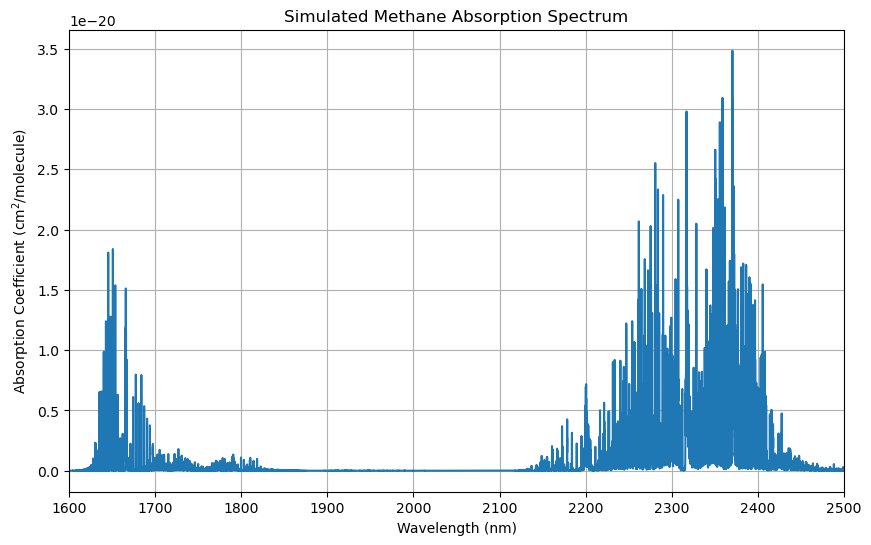

In [5]:
# Plot 
plt.figure(figsize=(10, 6))
plt.plot(wavelength_sorted, coef_sorted)
plt.title('Simulated Methane Absorption Spectrum')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorption Coefficient (cm$^2$/molecule)')
plt.xlim(1600, 2500)
plt.grid()
plt.show()